<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> A Deep Learning-Based Algorithm for American Sign Language Recognition  </h1> </div>

Speech-impaired individuals often rely on hand signs and gestures, or sign language, to communicate. People who are not familiar with sign language may find it difficult to understand these signs and gestures. This creates a communication barrier.
In the US, approximately around 500,000 people use American sign language (ASL) as primary means of communication.
With advancements in technology, particularly in the field of machine learning and artificial intelligence, it’s now possible to develop a system that can recognize sign language. Such a system could translate sign language breaking down the communication barrier, promoting inclusivity and accessibility and making interactions smoother and more natural.
 Our project aims to develop a system that can classify sign language symbols using deep learning techniques. This system will be able to recognize different signs and gestures and translate them into understandable language.



<a id='2'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Description </h2> </div>

The data set is a collection of images of alphabets from the American Sign
Language, separated in 36 folders which represent the various classes.
The data set contains 2515 images which are 400x400 pixels. There are 36 classes.The 36 classes contain 0-9 and A-Z alphabets.

<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div>

In [ ]:
pip install split-folders

DEPRECATION: Loading egg at /home/monster/anaconda3/lib/python3.11/site-packages/fire-0.5.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/monster/anaconda3/lib/python3.11/site-packages/fonttools-4.46.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/monster/anaconda3/lib/python3.11/site-packages/triton-2.1.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/monster/anaconda3/lib/python3.11/site-packages/point_e-0.0.0

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

2023-12-15 19:52:27.495445: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-15 19:52:27.521233: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 19:52:27.521254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 19:52:27.521936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 19:52:27.526355: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# Path where our data is located
base_path = "asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

filename  category
0        v/hand5_v_dif_seg_3_cropped_cropped.jpg        31
1          w/hand2_w_bot_seg_4_cropped_rot90.jpg        32
2          c/hand2_c_top_seg_5_cropped_rot90.jpg        12
3      3/hand2_3_left_seg_2_cropped_mirrored.jpg         3
4              o/hand2_o_left_seg_5_cropped.jpeg        24
...                                          ...       ...
15085      8/hand2_8_bot_seg_2_cropped_rot90.jpg         8
15086           y/hand3_y_dif_seg_5_cropped.jpeg        34
15087    4/hand1_4_right_seg_2_cropped_rot90.jpg         4
15088     u/hand1_u_top_seg_4_cropped_rot270.jpg        30
15089      r/hand1_r_bot_seg_2_cropped_rot90.jpg        27

[15090 rows x 2 columns]

In [ ]:
print("number of elements = ", len(df))

number of elements =  15090


<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

Below are our images in a grid format.

<h5 style="text-align:center;color:Green">We visualize few images of ASL. </h5>

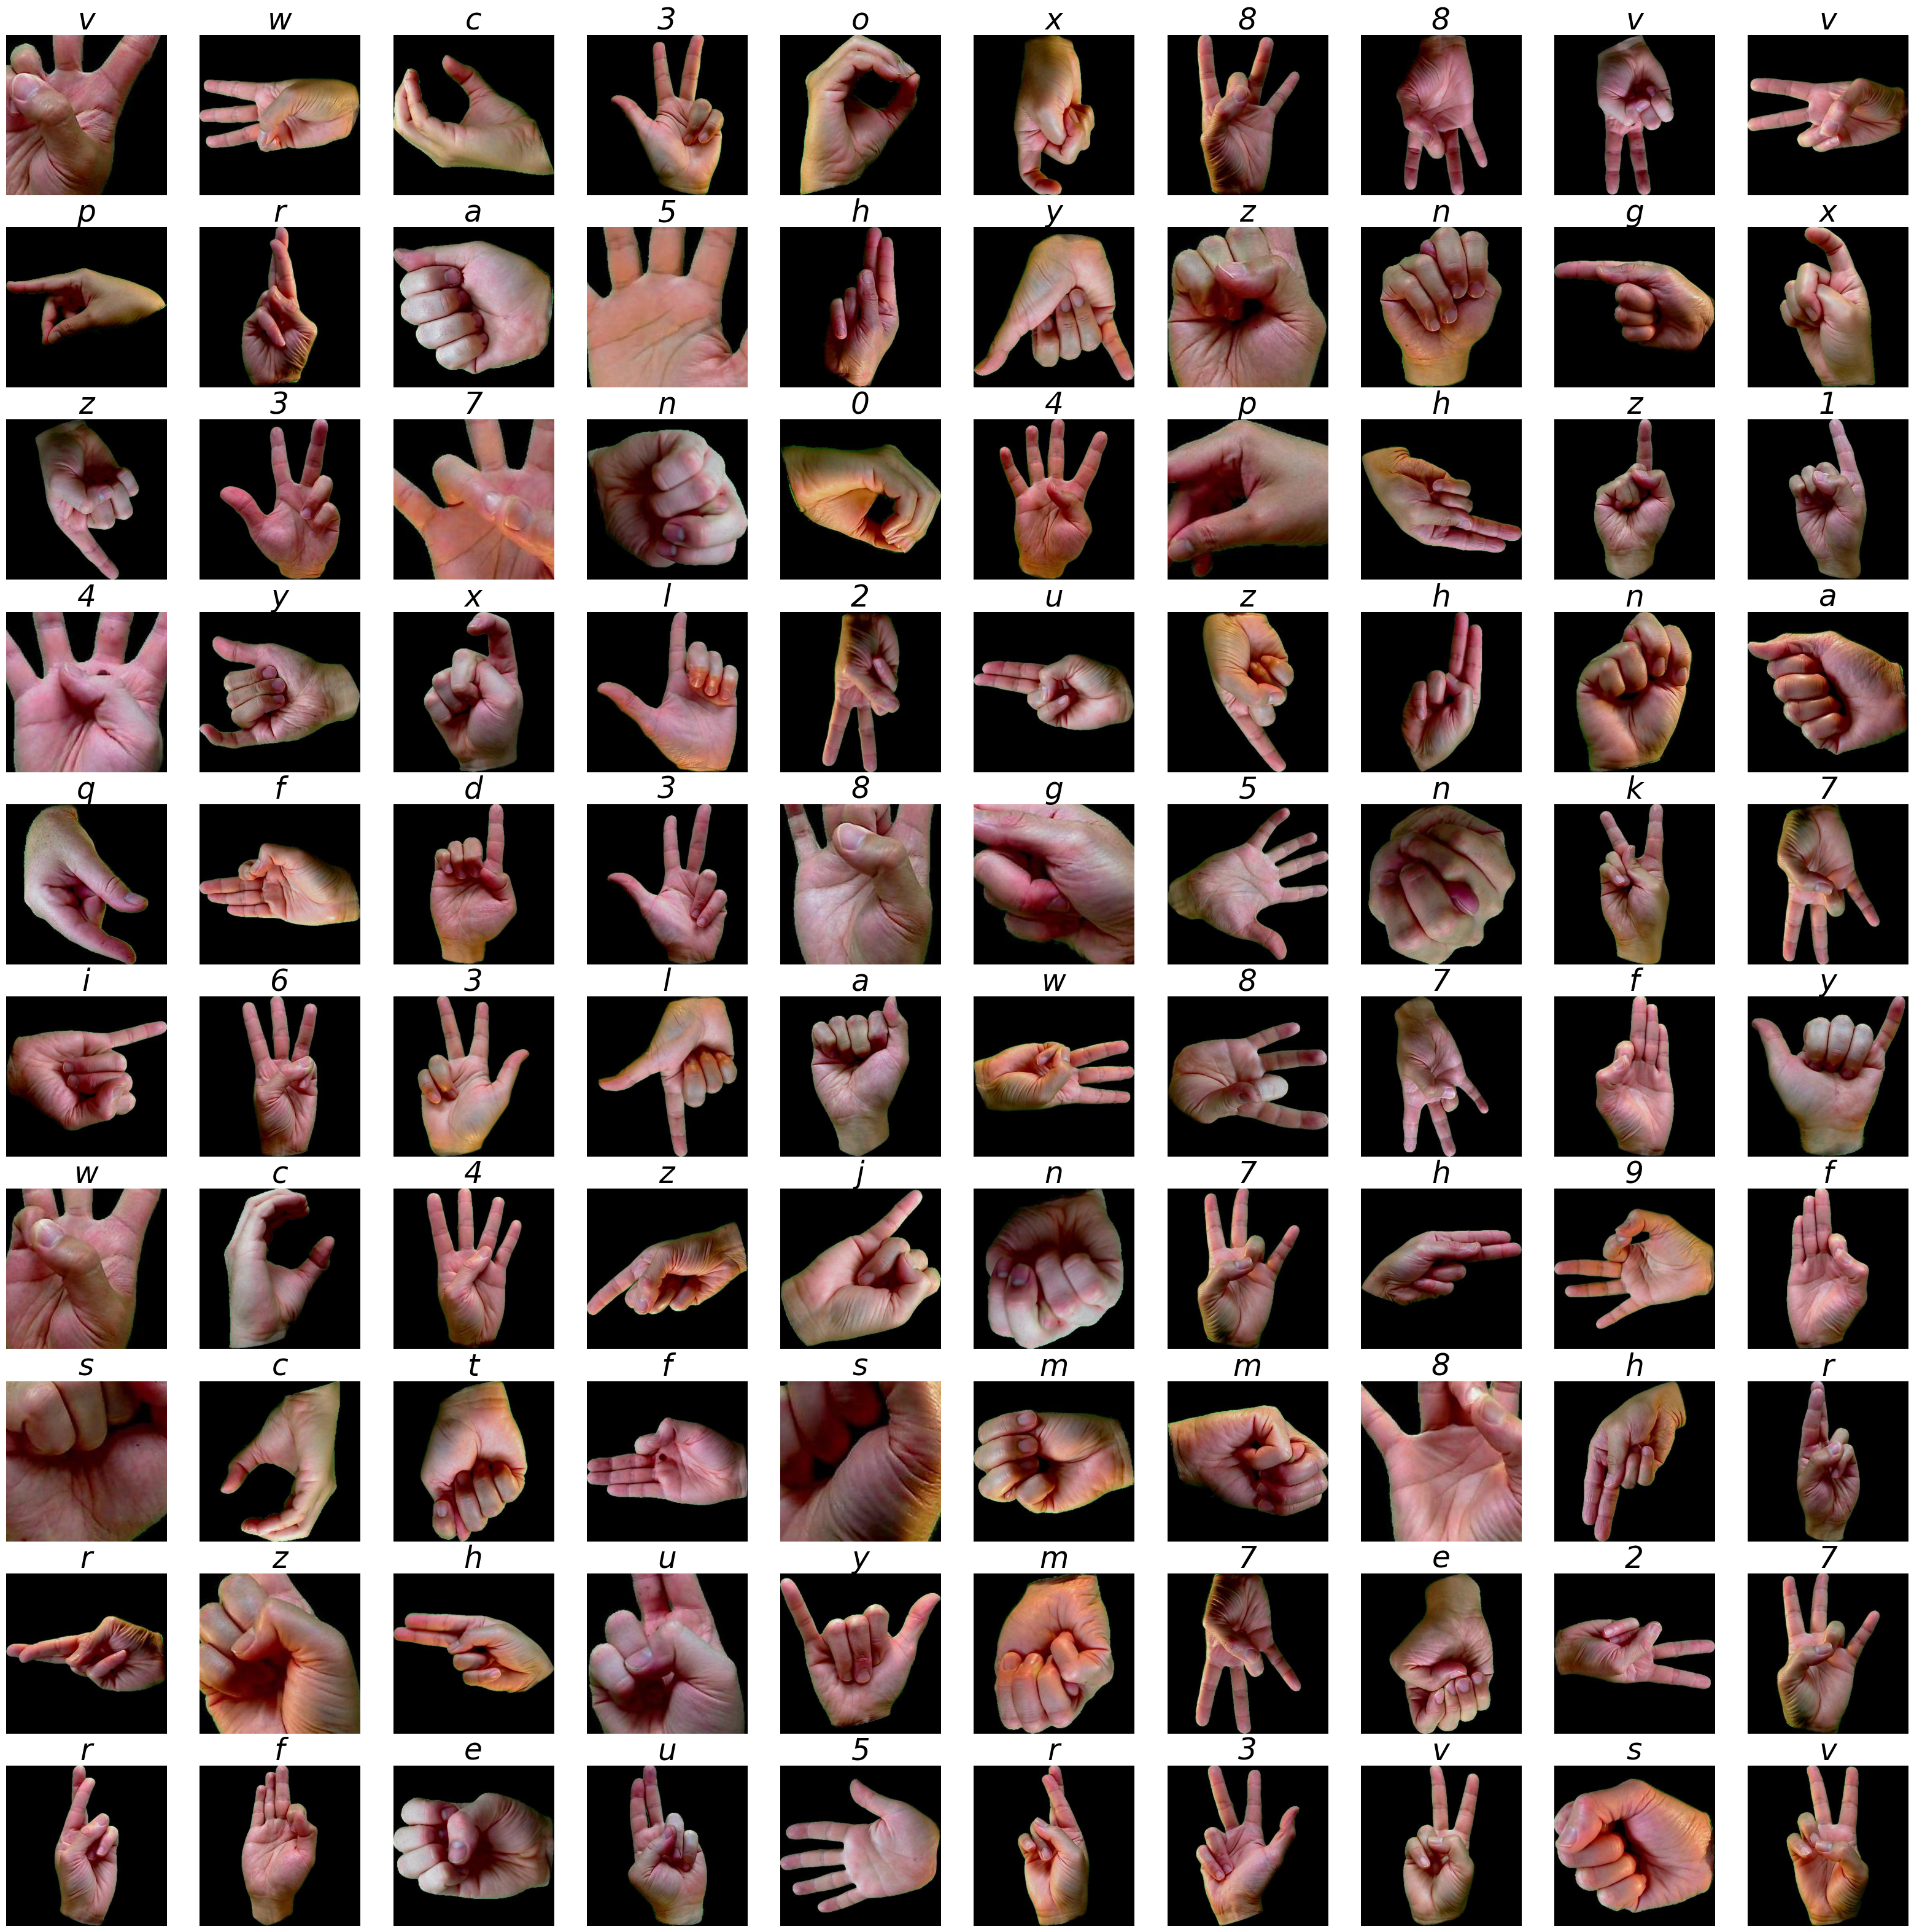

In [ ]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = base_path + df.filename[i]
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

Below is the distrubution of data in every class.

/tmp/ipykernel_9321/842432032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)


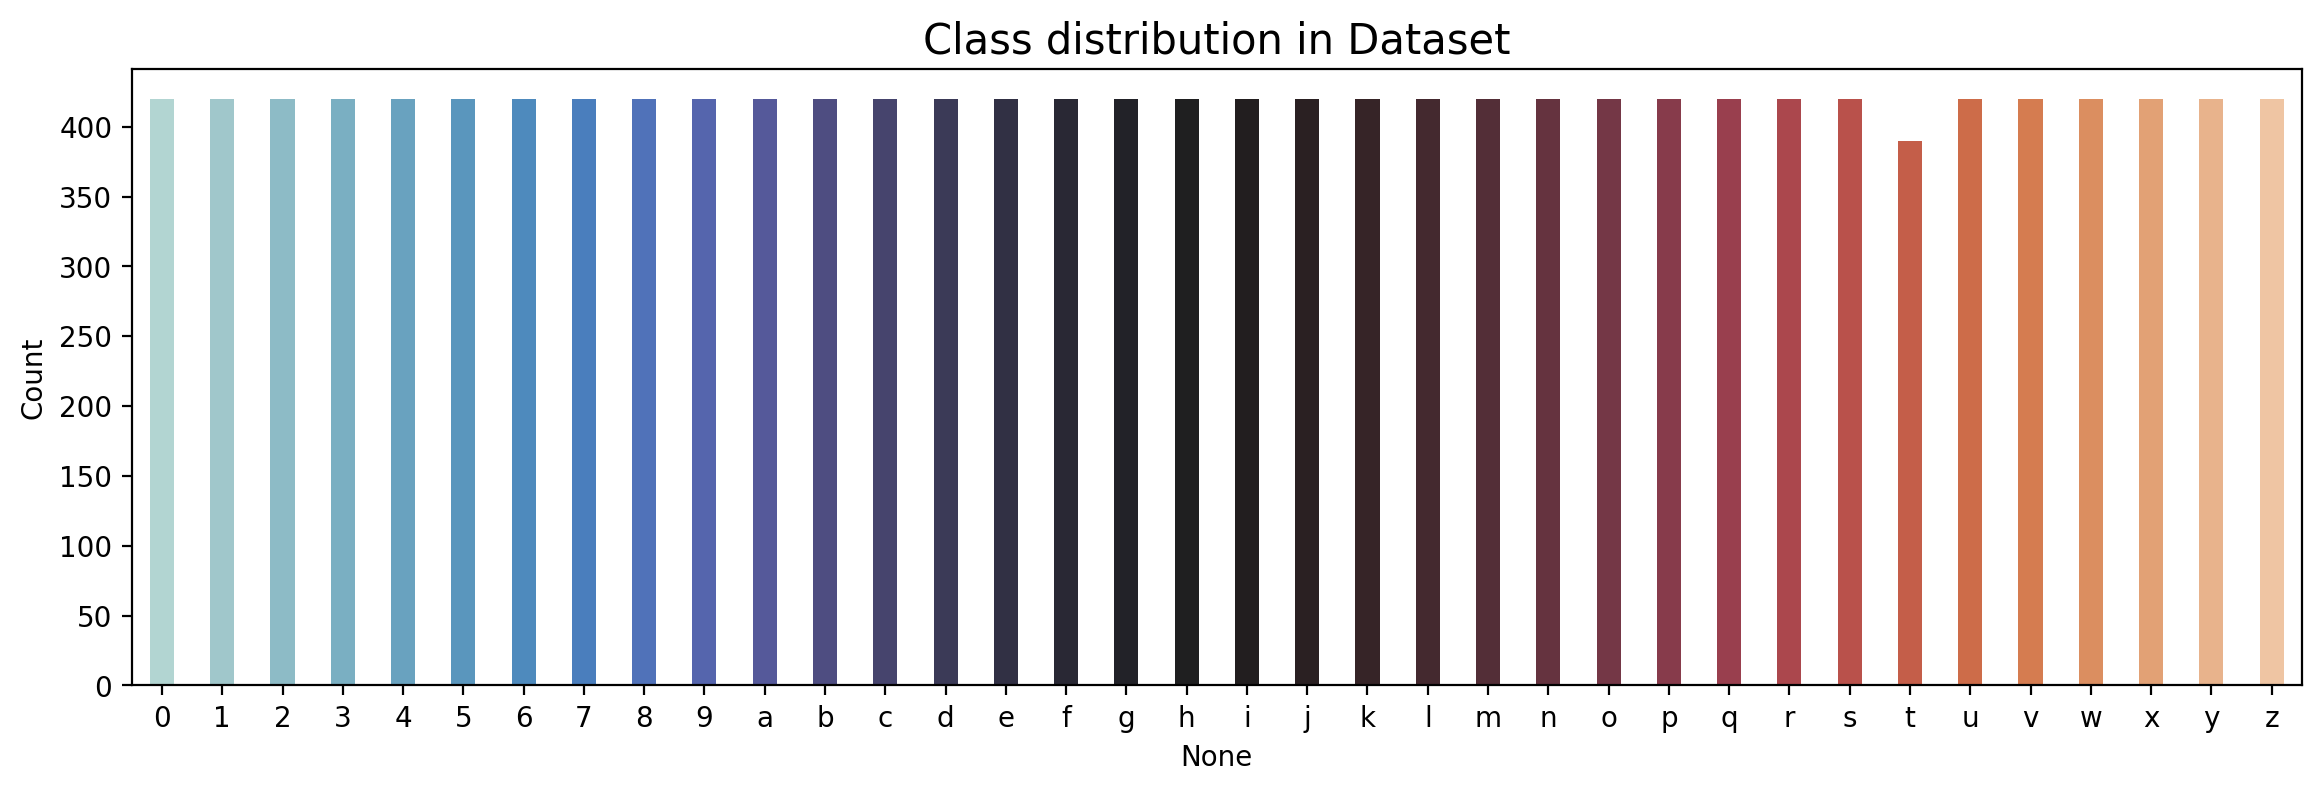

In [ ]:
label,count = np.unique(df.category,return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

<a id='6'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Train Test Split </h2> </div>

We split the data in three parts.
* Training dataset (80%)
* Validation dataset (10%)
* Testing dataset (10%)

In [ ]:
splitfolders.ratio('asl_dataset',output='working', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 15090 files [00:02, 6814.08 files/s]


<a id='7'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

<a id='8'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Image Data Generator </h3> </div>

* The data for will used by flow_from_directory.
* The batch size is 32 and the image size is (150,150).
* The Image Data Generator will be used to rescale the images.

In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [ ]:
train_path = 'working/train'
val_path = 'working/val'
test_path = 'working/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [ ]:
train_data = datagen.flow_from_directory(directory= train_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory= val_path,
                                       target_size=(image_size,image_size),
                                       batch_size = batch,
                                       class_mode='categorical',
                                       )

test_data = datagen.flow_from_directory(directory= test_path,
                                         target_size=(image_size,image_size),
                                         batch_size = batch,
                                         class_mode='categorical',
                                         shuffle= False)

Found 12072 images belonging to 36 classes.
Found 1509 images belonging to 36 classes.
Found 1509 images belonging to 36 classes.


<a id='10'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>


<a id='11'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Model Layers </h3> </div>

The architecture of the CNN Classification model consists of the following Layers and components:

The model contains the 3 blocks of convolution with increasing filters(32,64,128) and dropout (0.2,0.3,0.4) and activation function relu.
Each convolution block contains Max pooling (pool_size = 2).
The fully connected layers contain Flatten layer, Dense layer with 512 units and dropout layer with rate 0.2 and another dense layer with 128 units with dropout of 0.3 with relu activation.
The output layer is a Dense layer with 36 units and softmax activation.


In [ ]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (image_size,image_size,img_channel)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

#Block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation='softmax'))



model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

2023-12-15 19:52:38.143685: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 19:52:38.166856: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 19:52:38.166985: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

<a id='12'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Callbacks </h3> </div>
We used two callbacks -

* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True,
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                         patience = 2,
                                         factor=0.5 ,
                                         verbose = 1)

<a id='13'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Compile the model </h3> </div>

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. We used adam optimizer here.
​
* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. We used categorical crossentropy.
​
* **Metrics** :- This is to denote the measure of our model.We used accuracy.

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

<a id='14'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fitting the model </h3> </div>


In [ ]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=50,
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/50


2023-12-15 19:52:39.109768: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-12-15 19:52:39.283335: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-15 19:52:39.355381: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-15 19:52:39.907180: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-15 19:52:40.697133: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fea2cfbb2f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-15 19:52:40.697151: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 40

378/378 [==============================] - 61s 135ms/step - loss: 2.3499 - accuracy: 0.3274 - val_loss: 0.6749 - val_accuracy: 0.7860 - lr: 0.0010
Epoch 2/50
378/378 [==============================] - 47s 125ms/step - loss: 0.6711 - accuracy: 0.7783 - val_loss: 0.3514 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 3/50
378/378 [==============================] - 43s 113ms/step - loss: 0.3692 - accuracy: 0.8726 - val_loss: 0.2690 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 4/50
378/378 [==============================] - 43s 114ms/step - loss: 0.2531 - accuracy: 0.9156 - val_loss: 0.2162 - val_accuracy: 0.9245 - lr: 0.0010
Epoch 5/50
378/378 [==============================] - 47s 125ms/step - loss: 0.1849 - accuracy: 0.9370 - val_loss: 0.2073 - val_accuracy: 0.9364 - lr: 0.0010
Epoch 6/50
378/378 [==============================] - 47s 125ms/step - loss: 0.1533 - accuracy: 0.9501 - val_loss: 0.2264 - val_accuracy: 0.9291 - lr: 0.0010
Epoch 7/50
378/378 [==============================] - 44s 117ms



We evaluate the Training and validation data accuracy and loss.

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 100.0
The Loss of the model for training data is: 0.00020140773267485201
The accuracy of the model for validation data is: 96.75281643867493
The Loss of the model for validation data is: 0.15104980766773224


<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot the results </h3> </div>

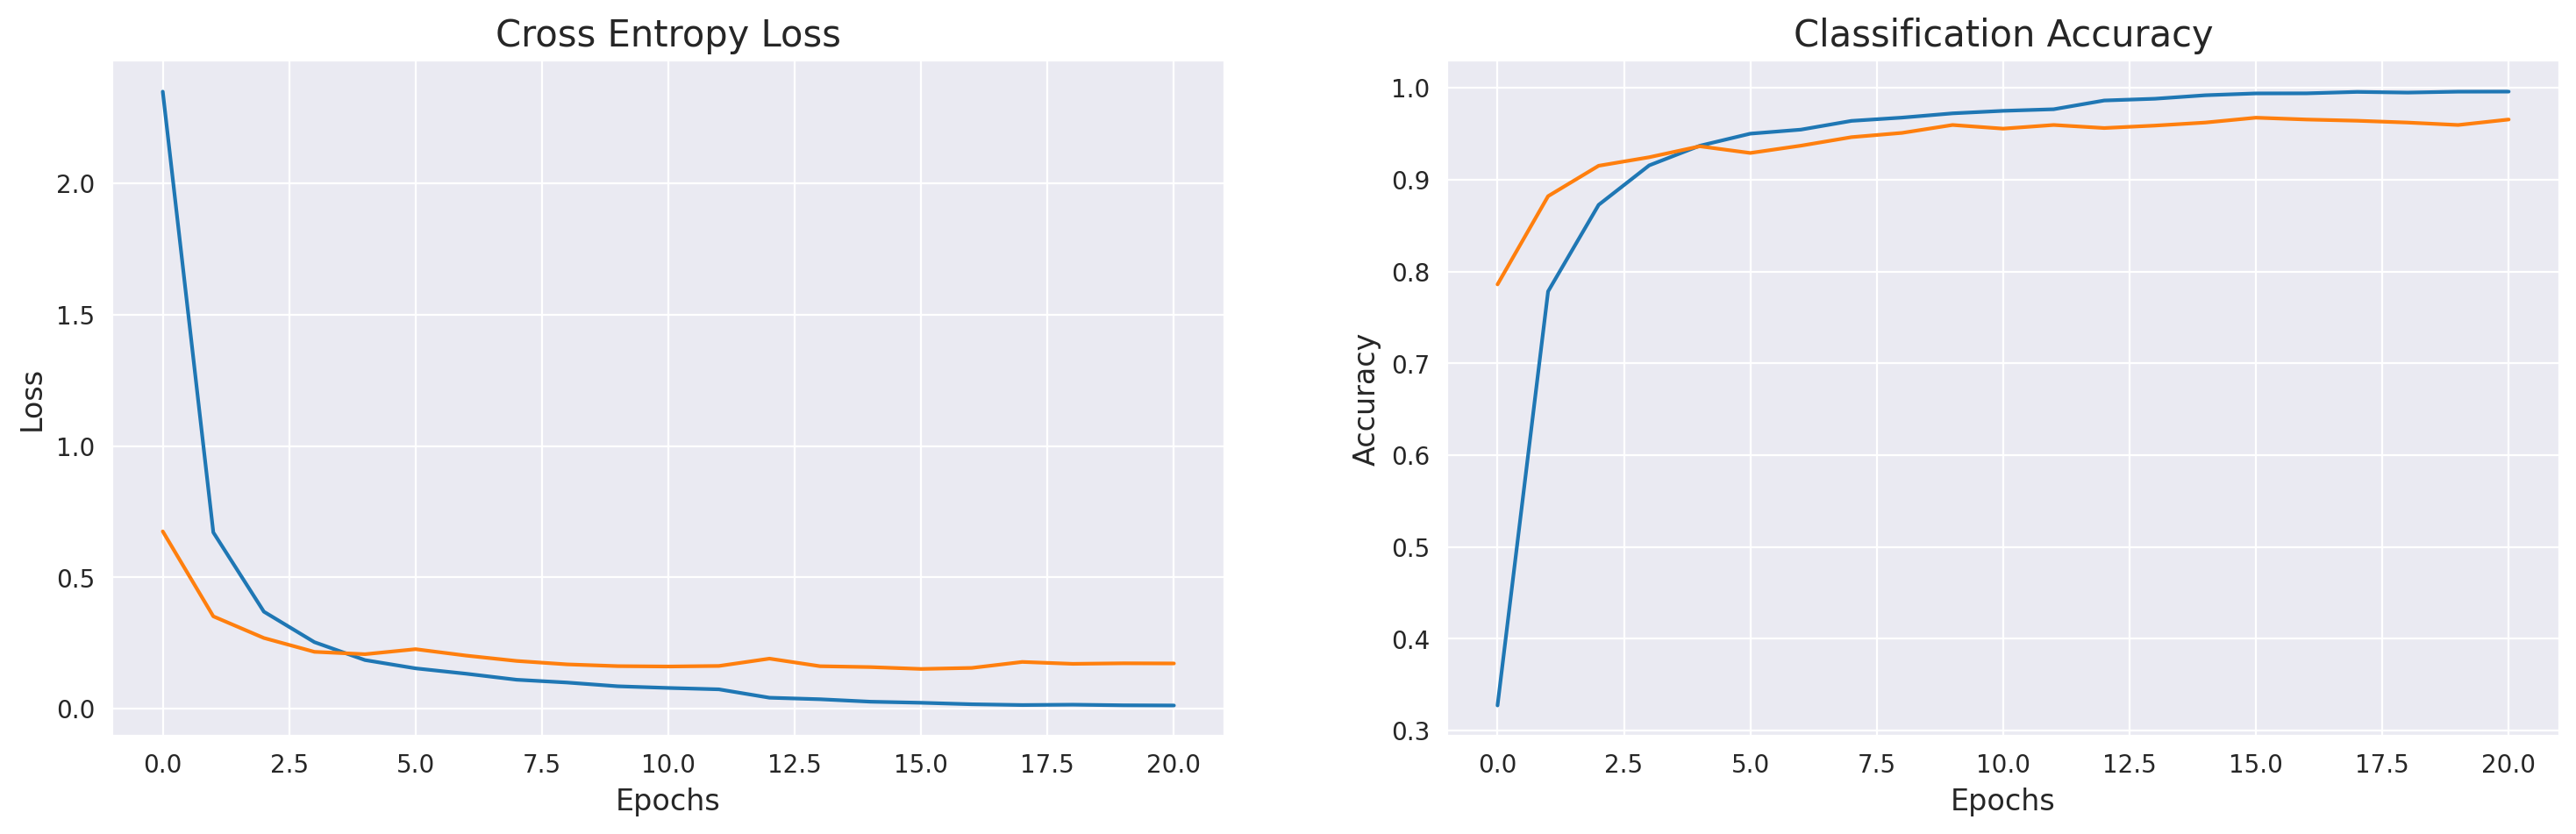

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id='17'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Prediction </h2> </div>

  Test Accuracy


In [ ]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 98.34327101707458
The Loss of the model for testing data is: 0.05891822278499603


The count of correctly and incorrectly classified images.

In [ ]:
p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 1484
Incorrect predicted classes: 25


Classification report

In [ ]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.98      0.98      0.98        42
           2       0.93      0.98      0.95        42
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        42
           6       0.95      0.93      0.94        42
           7       1.00      1.00      1.00        42
           8       1.00      0.98      0.99        42
           9       1.00      1.00      1.00        42
           a       0.98      0.98      0.98        42
           b       1.00      0.98      0.99        42
           c       1.00      0.98      0.99        42
           d       1.00      0.98      0.99        42
           e       0.98      1.00      0.99        42
           f       0.98      1.00      0.99        42
           g       0.95      0.98      0.96        42
           h       1.00    

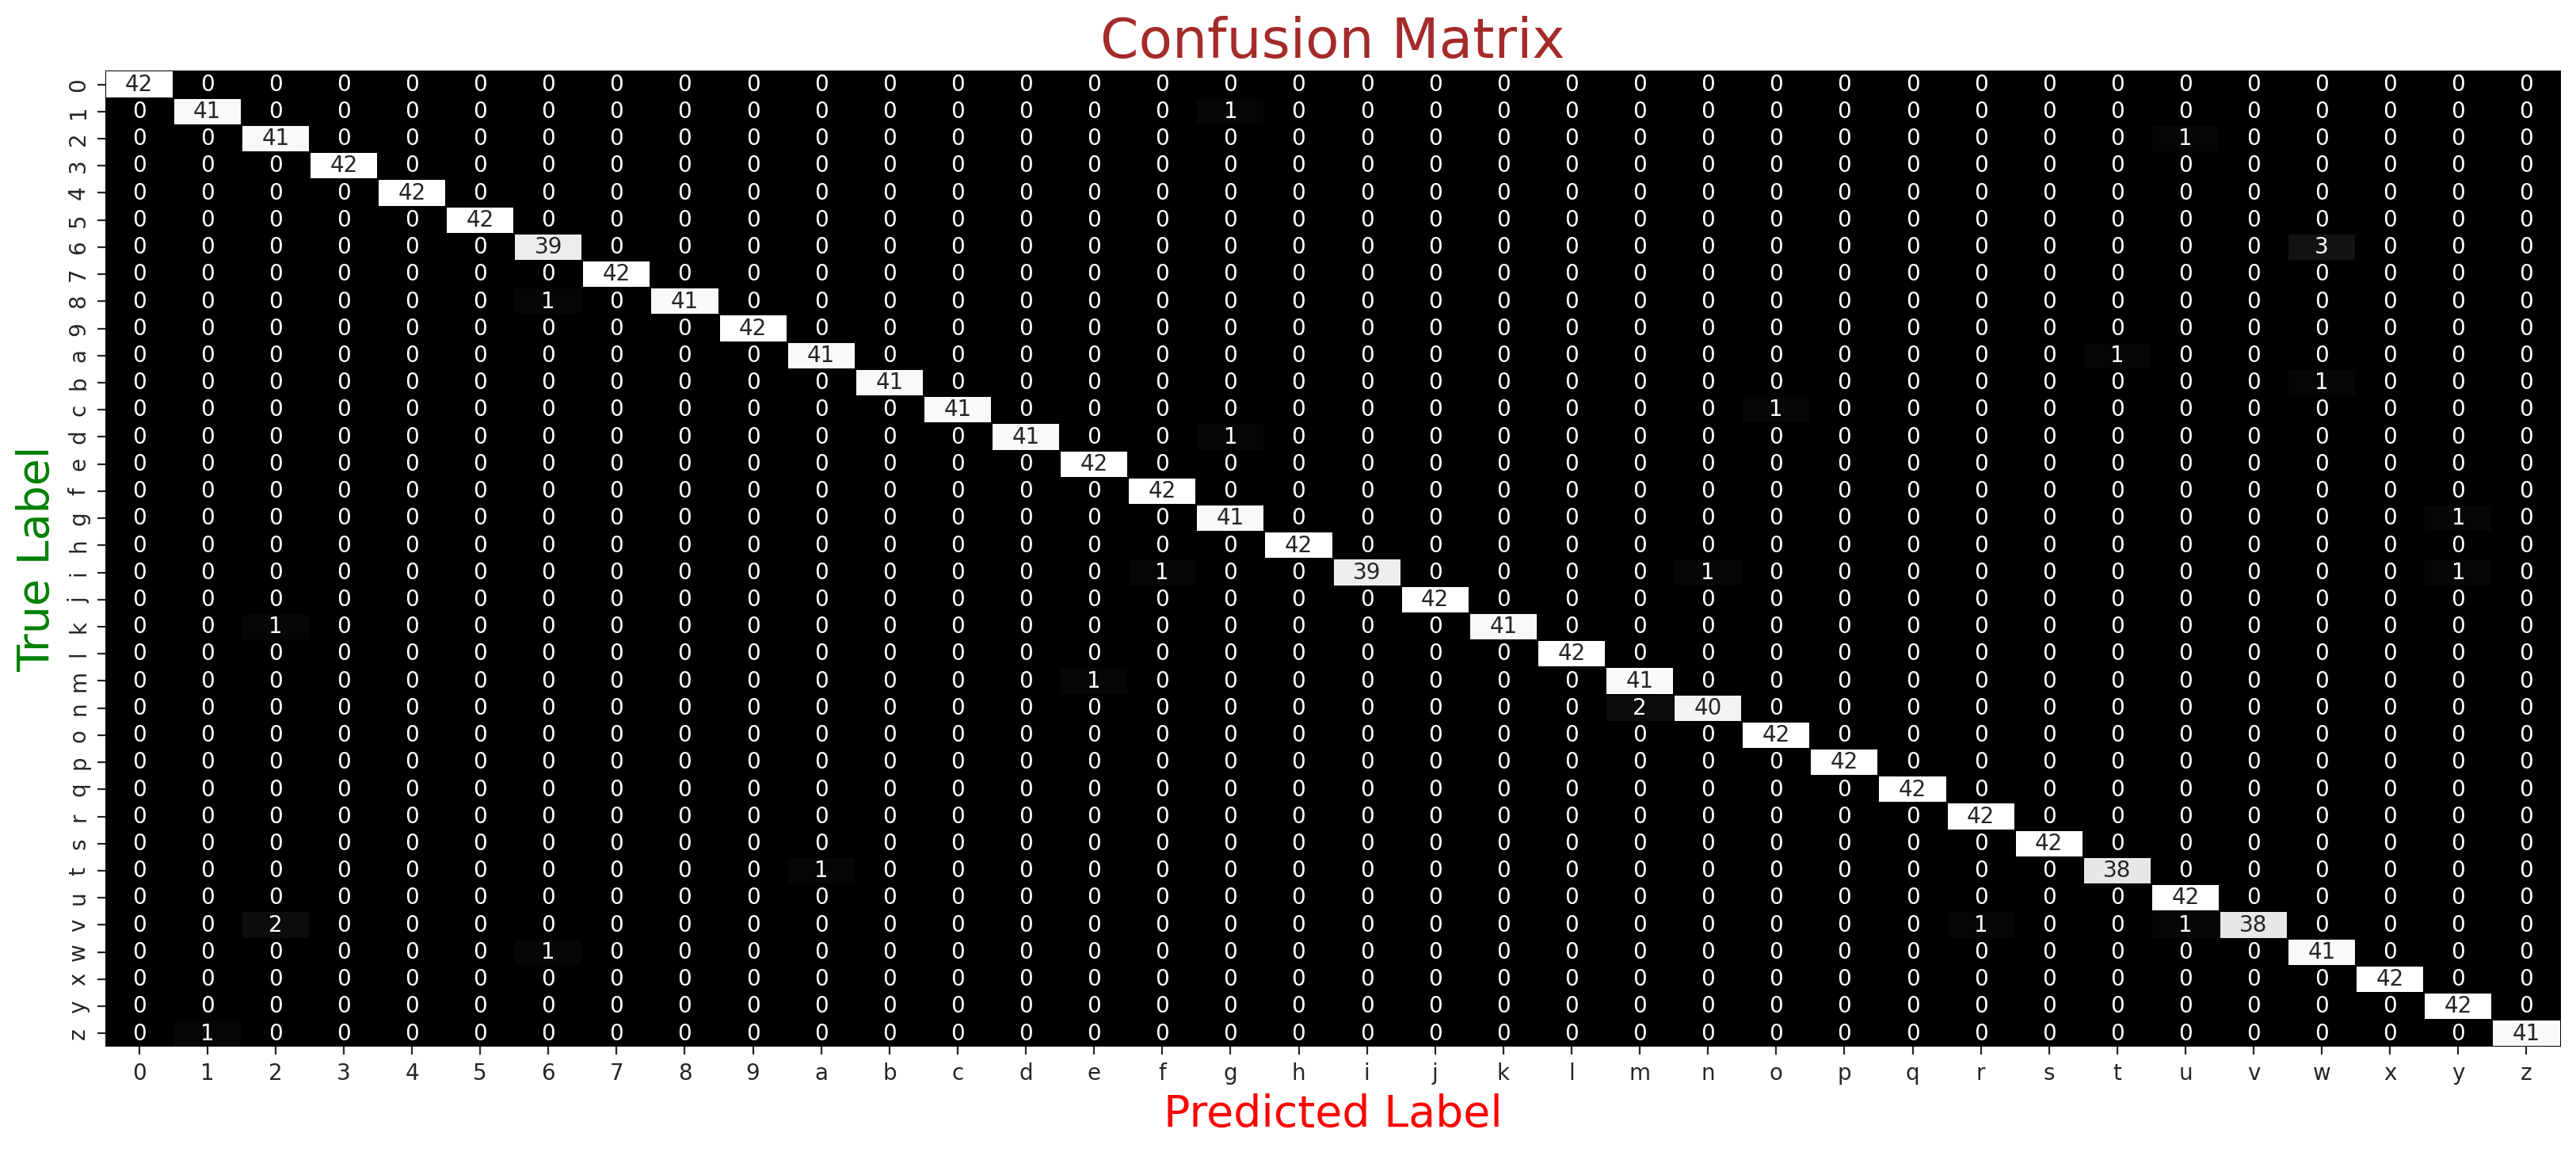

In [ ]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.1, cmap = "gist_yarg_r",
            linecolor="black", fmt='.0f', ax=ax,
            cbar=False, xticklabels=categories.values(),
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

<a id='18'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Conclusion </h2> </div>

We have successfully developed a deep learning model that leverages the power of Convolutional Neural Networks (CNN) to classify images of hand signs. The model has demonstrated an accuracy of 98.30%.

This project underscores the potential of deep learning algorithms in solving real-world challenges. Specifically, it highlights their capability in image analysis and interpretation tasks, such as the identification of American Sign Language (ASL) hand signs. By accurately distinguishing these images, our model serves as a testament to the transformative power of deep learning in enhancing communication and inclusivity for the deaf and hard-of-hearing community.